# Make FFT file for Amy

### Mar 15, 2021

## Code

In [1]:
import sys
import csv
# sys.path.insert(0,"/users/PCON0003/cond0068/.local/lib/python3.7/")
sys.path.append("/users/PAS0654/osu8354/ARA_cvmfs/root_build/lib/") # go to parent dir
sys.path.append("/users/PCON0003/cond0068/.local/lib/python3.7/site-packages/")
import ROOT
import math
import numpy as np
# from ROOT import TH1D,TF1, gRandom, gPad, gStyle
import matplotlib as mpl
import matplotlib.pyplot as plt
# from ROOT import TChain, TSelector, TTree
import os
import matplotlib.colors as mcolors
import scipy
from matplotlib.colors import LogNorm
import pandas as pd
import pyrex
import seaborn as sns
%matplotlib inline
sys.path.insert(1, "/users/PAS0654/osu8354/ARA_cvmfs/source/AraRoot/analysis/ARA_analysis/ARA_Reconstruction/")
import reco_util as util
# from pyrex.internal_functions import normalize
my_path_plots = os.path.abspath("./plots/")
# import pyrex.custom.ara as ara


Welcome to JupyROOT 6.18/04


In [2]:
# mpl.use('agg') 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.unicode'] = True
mpl.rcParams['mathtext.rm'] = 'Times New Roman'
mpl.rcParams['mathtext.it'] = 'Times New Roman:italic'
mpl.rcParams['mathtext.bf'] = 'Times New Roman:bold'

mpl.rc('font', family='serif', size=12)
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['ytick.major.size'] = 5

mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 18
# mpl.rc('font', size=16)
mpl.rc('axes', titlesize=20)

current_palette = sns.color_palette('colorblind', 10)
import warnings
warnings.filterwarnings("ignore")

## Spectra

In [3]:
spectra = pd.read_pickle("/users/PAS0654/osu8354/ARA_cvmfs/source/AraRoot/analysis/ARA_analysis/ARA_Reconstruction/forAmy_run012559.pkl")
# freqs = pd.read_pickle("/users/PAS0654/osu8354/ARA_cvmfs/source/AraRoot/analysis/ARA_analysis/ARA_Reconstruction/Spectra_freqs_run012559.pkl")

In [19]:
spectra.theta_reco

0      111.0
1       70.0
2      111.0
3      111.0
4      111.0
       ...  
892    100.0
893    100.0
894    100.0
895     79.0
896     79.0
Name: theta_reco, Length: 897, dtype: float64

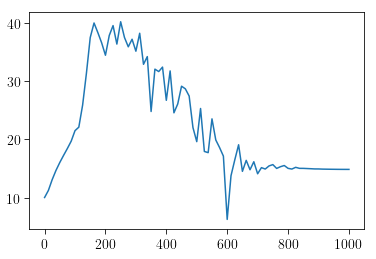

In [5]:
plt.plot(spectra.freqs[0], 10*np.log10(spectra.ch0FFT[0]))

ValueError: x and y must have same first dimension, but have shapes (81,) and (1,)

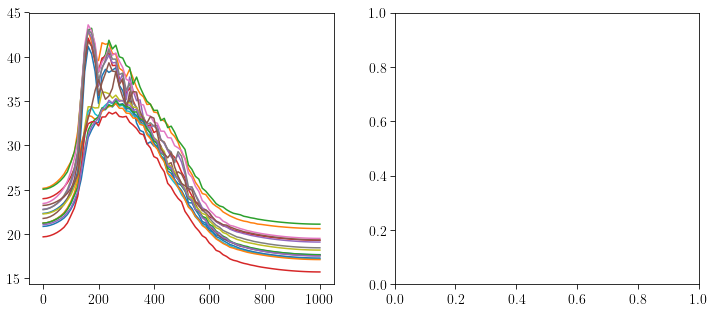

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))
for columnFFT in spectra.drop(columns=["evNum","freqs"]):
    ax[0].plot(spectra.freqs[0],10*np.log10(spectra[columnFFT].mean()),label = "%s"%columnFFT)
    if columnFFT == "ch8":
        break
ax[0].set_xlim(0,1000)
ax[0].set_ylim(0,45)
ax[0].set_xlabel("Freq. [MHz]")
ax[0].set_ylabel("Power (antenna-deconvolved) [dB]")

ax[0].set_ylabel
ax[0].grid()
ax[0].legend(ncol = 2, title = "Vpol channels", fontsize = 10)

plt.figure(figsize = (9,6))
for columnFFT in spectra.drop(columns=["evNum",'ch0','ch1','ch2','ch3','ch4','ch5','ch6','ch7',"freqs"]):
    ax[1].plot(spectra.freqs[0],10*np.log10(spectra[columnFFT].mean()),label = "%s"%columnFFT)
ax[1].set_xlim(0,1000)
ax[1].set_ylim(0,45)
ax[1].set_xlabel("Freq. [MHz]")
ax[1].set_ylabel("Power (antenna-deconvolved) [dB]")

ax[1].set_ylabel
ax[1].grid()
ax[1].legend(ncol = 2, title = "Hpol channels", fontsize = 10)

fig.suptitle("Average power of soft-triggered events in an 80 ns window, Run 012559", fontsize=20)
fig.tight_layout(rect=[0.03, 0.03, 1, 0.95])
# fig.savefig(my_path_plots+'/SpiceCorePolReco/SoftTrigAvgPow_run012559.pdf')

## Plot by pairs

In [34]:
meanPow = []
for column in spectra.drop(columns=["evNum", "freqs"]): 
    meanPow.append(spectra[column].mean())
#     plt.plot(freqs.ch0[0][1:],spectra[column].mean()[1:])

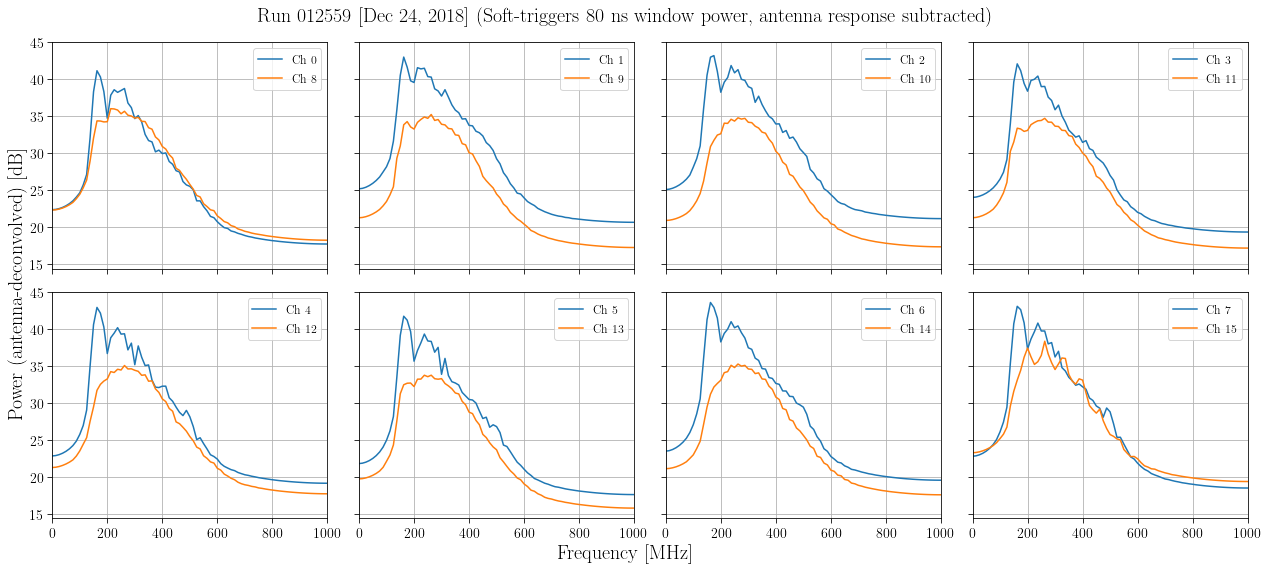

In [35]:
fig, ax = plt.subplots(2, 4, figsize=(18,8), sharex=True, sharey=True)
axs = ax.ravel()
for ch in range(0,8):
    axs[ch].plot(spectra.freqs[0],10*np.log10(meanPow[ch]), label = "Ch %i"%ch)
    axs[ch].plot(spectra.freqs[0],10*np.log10(meanPow[ch+8]), label = "Ch %i"%(ch+8))

    
# axs[6].set_xlabel("unixTime")
fig.text(0.5, 0.03, 'Frequency [MHz]', ha='center', va='center', fontsize=20)
fig.text(0.03, 0.5, 'Power (antenna-deconvolved) [dB]', ha='center', va='center', rotation='vertical', fontsize=20)

for ax in axs:
#     ax.set_xlabel("a")    
    ax.legend(loc="upper right")
#     ax.set_yscale('log')
    ax.set_xlim(0,1000)
#     ax.set_ylim(18,32)
    ax.grid()
plt.suptitle("Run 012559 [Dec 24, 2018] (Soft-triggers 80 ns window power, antenna response subtracted)", fontsize=20)
plt.tight_layout(rect=[0.03, 0.03, 1, 0.95])
# plt.savefig(my_path_plots+'/SpiceCorePolReco/DecoSoftTrigAvgPowPairs_run012559.pdf')

In [6]:
spectra.tail().unixTime

892    1545619966
893    1545619968
894    1545619969
895    1545619970
896    1545619971
Name: unixTime, dtype: int64

In [7]:
depth_1224 = pd.read_csv("./plots/SpiceCorePolReco/A2_1224Depth.txt")
time = pd.to_datetime(depth_1224.NZ_Time)
# time = time.reindex(time)
# time = time.tz_localize('NZ').tz_convert("UTC")
time.head()
newTime = time.apply(lambda dt: dt.replace(day=24, month = 12, year = 2018))
# newTime#Still in NZ local time. Need to translate to UTC
df = pd.DataFrame(1, index=newTime, columns=['X'])
import pytz
nz = pytz.timezone('NZ')
utc = pytz.timezone('UTC')
df.index = df.index.tz_localize(nz).tz_convert(utc)
unixTimeDepth = (df.index - pd.Timestamp("1970-01-01").tz_localize(utc)) // pd.Timedelta('1s')#This is unix time 

In [8]:
f = scipy.interpolate.interp1d(unixTimeDepth, depth_1224.depth,bounds_error=False, fill_value=0.)
interp_depth = f(spectra.unixTime)
spectra["depth"] = interp_depth

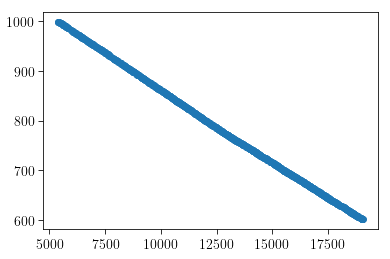

In [9]:
plt.scatter(spectra.evNum,spectra.depth)

In [10]:
chFFT = [[] for i in range(16)]
chPow = [[] for i in range(16)]
ThetaArr = []
PhiArr = []
freqArr = []
depthArr = []
evNumArr = []

for i in spectra.itertuples():
    chFFT[0].append(i.ch0FFT)
    chFFT[1].append(i.ch1FFT)
    chFFT[2].append(i.ch2FFT)
    chFFT[3].append(i.ch3FFT)
    chFFT[4].append(i.ch4FFT)
    chFFT[5].append(i.ch5FFT)
    chFFT[6].append(i.ch6FFT)
    chFFT[7].append(i.ch7FFT)
    chFFT[8].append(i.ch8FFT)
    chFFT[9].append(i.ch9FFT)
    chFFT[10].append(i.ch10FFT)
    chFFT[11].append(i.ch11FFT)
    chFFT[12].append(i.ch12FFT)
    chFFT[13].append(i.ch13FFT)
    chFFT[14].append(i.ch14FFT)
    chFFT[15].append(i.ch15FFT)
    
    chPow[0].append(i.ch0Pow)
    chPow[1].append(i.ch1Pow)
    chPow[2].append(i.ch2Pow)
    chPow[3].append(i.ch3Pow)
    chPow[4].append(i.ch4Pow)
    chPow[5].append(i.ch5Pow)
    chPow[6].append(i.ch6Pow)
    chPow[7].append(i.ch7Pow)
    chPow[8].append(i.ch8Pow)
    chPow[9].append(i.ch9Pow)
    chPow[10].append(i.ch10Pow)
    chPow[11].append(i.ch11Pow)
    chPow[12].append(i.ch12Pow)
    chPow[13].append(i.ch13Pow)
    chPow[14].append(i.ch14Pow)
    chPow[15].append(i.ch15Pow)
    
    freqArr.append(i.freqs)
    ThetaArr.append(i.theta_reco)
    PhiArr.append(i.phi_reco)
    depthArr.append(i.depth)
    evNumArr.append(i.evNum)

In [16]:
from array import array
N = len(spectra.freqs[0])

f = ROOT.TFile('forAmy_run012559v2.root','recreate')
tFFT = ROOT.TTree('tFFT','Deconvolved_FFT')
tPower = ROOT.TTree('tPower','Deconvolved_Power')
tGeometry = ROOT.TTree('tGeometry','RecoAngles_Depth')

fft = [array('f',N*[0.]) for i in range(16)]
power = array('f',16*[0.])
freq = array('f',N*[0.])
theta = array('f',[0])
phi = array('f',[0])
depth = array('f',[0])
evNum = array('i',[0])



tFFT.Branch('FFTCh0',fft[0],'FFTCh0[81]/F')
tFFT.Branch('FFTCh1',fft[1],'FFTCh1[81]/F')
tFFT.Branch('FFTCh2',fft[2],'FFTCh2[81]/F')
tFFT.Branch('FFTCh3',fft[3],'FFTCh3[81]/F')
tFFT.Branch('FFTCh4',fft[4],'FFTCh4[81]/F')
tFFT.Branch('FFTCh5',fft[5],'FFTCh5[81]/F')
tFFT.Branch('FFTCh6',fft[6],'FFTCh6[81]/F')
tFFT.Branch('FFTCh7',fft[7],'FFTCh7[81]/F')
tFFT.Branch('FFTCh8',fft[8],'FFTCh8[81]/F')
tFFT.Branch('FFTCh9',fft[9],'FFTCh9[81]/F')
tFFT.Branch('FFTCh10',fft[10],'FFTCh10[81]/F')
tFFT.Branch('FFTCh11',fft[11],'FFTCh11[81]/F')
tFFT.Branch('FFTCh12',fft[12],'FFTCh12[81]/F')
tFFT.Branch('FFTCh13',fft[13],'FFTCh13[81]/F')
tFFT.Branch('FFTCh14',fft[14],'FFTCh14[81]/F')
tFFT.Branch('FFTCh15',fft[15],'FFTCh15[81]/F')
tFFT.Branch('Freqs',freq,'Freqs[81]/F')

tPower.Branch('powerChArray',power,'powerChArray[16]/F')
tGeometry.Branch("Theta",theta,'Theta/F')
tGeometry.Branch("Phi",phi,'Phi/F')
tGeometry.Branch("Depth",depth,'Depth/F')
tGeometry.Branch("EvNumber",evNum,'EvNumber/I')


for i in range(np.shape(chFFT)[1]):
    evNum[0] = evNumArr[i]
    theta[0] = ThetaArr[i]
    phi[0] = PhiArr[i]
    depth[0] = depthArr[i]
    for k in range(N):
        freq[k] = freqArr[i][k]
    for chan in range(16):
        power[chan] = chPow[chan][i]
        for j in range(N):
            fft[chan][j] = chFFT[chan][i][j]
    tFFT.Fill()
    tPower.Fill()
    tGeometry.Fill()
    
f.Write()
f.Close()


In [12]:
myfile = ROOT.TFile('/users/PAS0654/osu8354/ARA_cvmfs/source/AraRoot/analysis/ARA_analysis/ARA_Reconstruction/test.root')
# myfile = ROOT.TFile('forAmy_run012559.root')

In [13]:
tFFT = myfile.Get("tFFT")
myfile.Get("tFFT").Print()

******************************************************************************
*Tree    :tFFT      : Deconvolved_FFT                                        *
*Entries :      897 : Total =         4962384 bytes  File  Size =    4321463 *
*        :          : Tree compression factor =   1.15                       *
******************************************************************************
*Br    0 :FFTCh0    : FFTCh0[81]/F                                           *
*Entries :      897 : Total  Size=     291875 bytes  File Size  =     270097 *
*Baskets :       10 : Basket Size=      32000 bytes  Compression=   1.08     *
*............................................................................*
*Br    1 :FFTCh1    : FFTCh1[81]/F                                           *
*Entries :      897 : Total  Size=     291875 bytes  File Size  =     269785 *
*Baskets :       10 : Basket Size=      32000 bytes  Compression=   1.08     *
*...................................................

In [15]:
# for element in tFFT:
#     print(element.FFTCh15[10])
